In [18]:
import numpy as np

In [1]:
from DataLoad import load_to_dataframe
df, df_raw, class_dict = load_to_dataframe()

In [7]:
from feature_generator import create_features

In [8]:
features, labels = create_features(df_raw, 'Mel_Linear_2_Param.txt')

Only FFT transformation with 2 channels for real and imaginary part, linear absolute values between 0 and 1
Hop_length:  1024
Sampling Rate: 44100
Fast Fourier Window: 1024
Number of MEL Bins: 15
Shape of Feature:  [15, 130, 1]
Minimum Frequency:  0.0
Maximum Frequency:  11025.0


In [9]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.3)

In [11]:
from tensorflow.keras.utils import Sequence

In [46]:
class SoundSequence(Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return (np.array(batch_x), np.array(batch_y))

In [76]:
train_gen = SoundSequence(X_train, y_train, 30)

In [77]:
test_gen = SoundSequence(X_test, y_test, 30)

In [130]:
train_gen[8][1]

array([ 4, 10,  6,  4,  9,  8,  8,  4,  8,  8,  8,  4, 10,  1,  6,  4, 10,
        1,  9, 10,  8,  2,  1,  9,  3,  0, 10,  6,  3,  5])

In [134]:
features.shape[1:]

(15, 130, 1)

In [121]:
from tensorflow.keras import layers, models
input_shape = features.shape

num_filters = 8
filter_size = 3

model = models.Sequential()
#model.add(layers.Conv1D(1, kernel_size = 200, input_shape=(13299,1))) #
model.add(layers.Conv2D(32,(2,5), activation="relu", input_shape=(X_train.shape[1:])))#(15,130,1)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(LSTM(64))
model.add(layers.Conv2D(64, (2,5), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 5), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SpatialDropout2D(0.5))
#model.add(layers.Dropout(0.5))
#
model.add(layers.Flatten())
model.add(layers.Dense(11, activation="softmax"))
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 14, 126, 32)       352       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 7, 63, 32)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 6, 59, 64)         20544     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 3, 29, 64)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 2, 25, 128)        82048     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 1, 12, 128)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 1, 12, 128)      

In [122]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
history = model.fit(
    train_gen,
    steps_per_epoch=30,
    epochs=20,
    validation_data=test_gen,
    validation_steps=30
    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30 steps, validate for 30 steps
Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 1.7903 - accuracy: 0.3794 - val_loss: 2.0176 - val_accuracy: 0.3222
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 1.7686 - accuracy: 0.3783 - val_loss: 2.0165 - val_accuracy: 0.3256
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 1.7929 - accuracy: 0.3733 - val_loss: 1.9469 - val_accuracy: 0.3389
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 1.7233 - accuracy: 0.4122 - val_loss: 1.9580 - val_accuracy: 0.3133
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 1.7380 - accuracy: 0.4189 - val_loss: 1.9427 - val_accuracy: 0.3467
Epoch 6/20
30/30 [==============================] - 2s 53ms/step - loss: 1.7352 - accuracy: 0.3956 - val_loss: 1.9662 - val_accuracy: 0.3456
Epoch 7/20
30/30 [==============================] - 2s 53ms/st

In [123]:
history = model.fit(
    X_train, y_train,
#    steps_per_epoch=10,
    epochs=30,
    validation_data=(X_test, y_test)
#    validation_steps=50
)

Train on 4693 samples, validate on 2012 samples
Epoch 1/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.3414 - accuracy: 0.1481 - val_loss: 2.3035 - val_accuracy: 0.1605
Epoch 2/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.2882 - accuracy: 0.1818 - val_loss: 2.2464 - val_accuracy: 0.1948
Epoch 3/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.2374 - accuracy: 0.1916 - val_loss: 2.2242 - val_accuracy: 0.2137
Epoch 4/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.2169 - accuracy: 0.2188 - val_loss: 2.1673 - val_accuracy: 0.2584
Epoch 5/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.1829 - accuracy: 0.2306 - val_loss: 2.1490 - val_accuracy: 0.2604
Epoch 6/30
4693/4693 [==============================] - 5s 1ms/sample - loss: 2.1582 - accuracy: 0.2389 - val_loss: 2.1295 - val_accuracy: 0.2470
Epoch 7/30
4693/4693 [==============================] - 5s 1ms/sample - loss

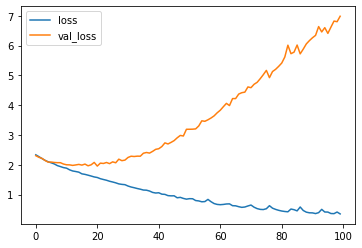

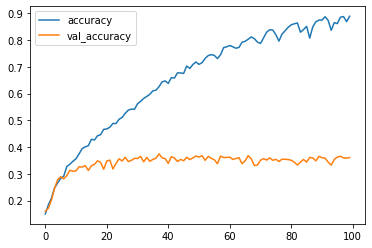

In [107]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["loss"], label="loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history["accuracy"], label="accuracy")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()